In [234]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.compose import ColumnTransformer, make_column_transformer
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from time import time
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from datetime import timedelta
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [235]:
warnings.filterwarnings('ignore')

In [236]:
data = pd.read_csv('./clean.csv')

In [237]:
data

Unnamed: 0                       customer_id  \
0                0  06b8999e2fba1a1fbc88172c00ba8bc7   
1                1  18955e83d337fd6b2def6b18a428ac77   
2                2  4e7b3e00288586ebd08712fdd0374a03   
3                3  b2b6027bc5c5109e529d4dc6358b12c3   
4                4  4f2d8ab171c80ec8364f7c12e35b23ad   
...            ...                               ...   
113203      119138  17ddf5dd5d51696bb3d7c6291687be6f   
113204      119139  e7b71a9017aa05c9a7fd292d714858e8   
113205      119140  5e28dfe12db7fb50a4b2f691faecea5e   
113206      119141  56b18e2166679b8a959d72dd06da27f9   
113207      119142  274fa6071e5e17fe303b9748641082c8   

                      customer_unique_id  customer_zip_code_prefix  \
0       861eff4711a542e4b93843c6dd7febb0                     14409   
1       290c77bc529b7ac935b93aa66c333dc3                      9790   
2       060e732b5b29e8181a18229c7b0b2b5e                      1151   
3       259dac757896d24d7702b9acbbff3f3c                      8775   
4       345ecd01c38d18a9036ed96c73b8d066                     13056   
...                                  ...                       ...   
113203  1a29b476fee25c95fbafc67c5ac95cf8                      3937   
113204  d52a67c98be1cf6a5c84435bd38d095d                      6764   
113205  e9f50caf99f032f0bf3c55141f019d99                     60115   
113206  73c2643a0a458b49f58cea58833b192e                     92120   
113207  84732c5050c01db9b23e19ba39899398                      6703   

                customer_city customer_state  \
0                      franca             SP   
1       sao bernardo do campo             SP   
2                   sao paulo             SP   
3             mogi das cruzes             SP   
4                    campinas             SP   
...                       ...            ...   
113203              sao paulo             SP   
113204        taboao da serra             SP   
113205              fortaleza             CE   
113206                 canoas             RS   
113207                  cotia             SP   

                                order_id order_purchase_timestamp  \
0       00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35   
1       29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24   
2       b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45   
3       951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38   
4       6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30   
...                                  ...                      ...   
113203  6760e20addcf0121e9d58f2f1ff14298      2018-04-07 15:48:17   
113204  9ec0c8947d973db4f4e8dcf1fbfa8f1b      2018-04-04 08:20:22   
113205  fed4434add09a6f332ea398efd656a5c      2018-04-08 20:11:50   
113206  e31ec91cea1ecf97797787471f98a8c2      2017-11-03 21:08:33   
113207  28db69209a75e59f20ccbb5c36a20b90      2017-12-19 14:27:23   

          order_approved_at order_delivered_carrier_date  ... order_item_id  \
0       2017-05-16 15:22:12          2017-05-23 10:47:57  ...           1.0   
1       2018-01-12 20:58:32          2018-01-15 17:14:59  ...           1.0   
2       2018-05-20 16:19:10          2018-06-11 14:31:00  ...           1.0   
3       2018-03-13 17:29:19          2018-03-27 23:22:42  ...           1.0   
4       2018-07-29 10:10:09          2018-07-30 15:16:00  ...           1.0   
...                     ...                          ...  ...           ...   
113203  2018-04-07 16:08:45          2018-04-11 02:08:36  ...           1.0   
113204  2018-04-04 08:35:12          2018-04-05 18:42:35  ...           1.0   
113205  2018-04-08 20:30:03          2018-04-09 17:52:17  ...           1.0   
113206  2017-11-03 21:31:20          2017-11-06 18:24:41  ...           1.0   
113207  2017-12-19 18:50:39          2017-12-21 19:17:21  ...           1.0   

                              product_id  shipping_limit_date   price  \
0       a9516a079e37a9c9c36b9b78b10169e8  2017-05-22 15:22:12  124

In [238]:
data2 = data.copy()

In [239]:
# Transformer les variables représentant des dates/heures en Datetime
cols = ['shipping_limit_date', 'order_purchase_timestamp',
        'order_delivered_carrier_date', 'order_delivered_customer_date',
        'order_estimated_delivery_date', 'order_approved_at']
for col in cols:
    data2[col] = pd.to_datetime(data2[col],
                                    format='%Y-%m-%d %H:%M:%S')

In [240]:
data2 = data2.drop(['Unnamed: 0', 'order_id', 'customer_city', 'customer_state', 'product_id'], axis=1)

In [241]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113208 entries, 0 to 113207
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113208 non-null  object        
 1   customer_unique_id             113208 non-null  object        
 2   customer_zip_code_prefix       113208 non-null  int64         
 3   order_purchase_timestamp       113208 non-null  datetime64[ns]
 4   order_approved_at              113208 non-null  datetime64[ns]
 5   order_delivered_carrier_date   113208 non-null  datetime64[ns]
 6   order_delivered_customer_date  113208 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113208 non-null  datetime64[ns]
 8   review_score                   113208 non-null  float64       
 9   review_reaction                113208 non-null  object        
 10  order_item_id                  113208 non-null  float64       
 11  

In [242]:
df_agg_final = data2.groupby('customer_unique_id').agg({'order_item_id' : 'sum', 
                                                        'review_score' : 'mean',
                                                        ('payment_value') : 'sum', 
                                                        ('payment_sequential') : 'max', 
                                                        ('payment_type') : 'max',
                                                        ('freight_value') : 'max', 
                                                        ('price' ) : 'max', 
                                                        'customer_zip_code_prefix' : 'sum',
                                                        'customer_unique_id' : 'max',                                                        
                                                        'order_purchase_timestamp' : 'max'})

In [243]:
df_agg_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91477 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_item_id             91477 non-null  float64       
 1   review_score              91477 non-null  float64       
 2   payment_value             91477 non-null  float64       
 3   payment_sequential        91477 non-null  float64       
 4   payment_type              91477 non-null  object        
 5   freight_value             91477 non-null  float64       
 6   price                     91477 non-null  float64       
 7   customer_zip_code_prefix  91477 non-null  int64         
 8   customer_unique_id        91477 non-null  object        
 9   order_purchase_timestamp  91477 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 7.7+ MB


In [244]:
df_agg_final

order_item_id  review_score  payment_value  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2            1.0           5.0         141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f            1.0           4.0          27.19   
0000f46a3911fa3c0805444483337064            1.0           3.0          86.22   
0000f6ccb0745a6a4b88665a16c9f078            1.0           4.0          43.62   
0004aac84e0df4da2b147fca70cf8255            1.0           5.0         196.89   
...                                         ...           ...            ...   
fffcf5a5ff07b0908bd4e2dbc735a684            3.0           5.0        4134.84   
fffea47cd6d3cc0a88bd621562a9d061            1.0           4.0          84.58   
ffff371b4d645b6ecea244b27531430a            1.0           5.0         112.46   
ffff5962728ec6157033ef9805bacc48            1.0           5.0         133.69   
ffffd2657e2aad2907e67c3e9daecbeb            1.0           5.0          71.56   

                                  payment_sequential payment_type  \
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2                 1.0  credit_card   
0000b849f77a49e4a4ce2b2a4ca5be3f                 1.0  credit_card   
0000f46a3911fa3c0805444483337064                 1.0  credit_card   
0000f6ccb0745a6a4b88665a16c9f078                 1.0  credit_card   
0004aac84e0df4da2b147fca70cf8255                 1.0  credit_card   
...                                              ...          ...   
fffcf5a5ff07b0908bd4e2dbc735a684                 1.0  credit_card   
fffea47cd6d3cc0a88bd621562a9d061                 1.0  credit_card   
ffff371b4d645b6ecea244b27531430a                 1.0  credit_card   
ffff5962728ec6157033ef9805bacc48                 1.0  credit_card   
ffffd2657e2aad2907e67c3e9daecbeb                 1.0  credit_card   

                                  freight_value   price  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2          12.00  129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           8.29   18.90   
0000f46a3911fa3c0805444483337064          17.22   69.00   
0000f6ccb0745a6a4b88665a16c9f078          17.63   25.99   
0004aac84e0df4da2b147fca70cf8255          16.89  180.00   
...                                         ...     ...   
fffcf5a5ff07b0908bd4e2dbc735a684         258.28  890.00   
fffea47cd6d3cc0a88bd621562a9d061          19.69   64.89   
ffff371b4d645b6ecea244b27531430a          22.56   89.90   
ffff5962728ec6157033ef9805bacc48          18.69  115.00   
ffffd2657e2aad2907e67c3e9daecbeb          14.57   56.99   

                                  customer_zip_code_prefix  \
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2                      7787   
0000b849f77a49e4a4ce2b2a4ca5be3f                      6053   
0000f46a3911fa3c0805444483337064                     88115   
0000f6ccb0745a6a4b88665a16c9f078                     66812   
0004aac84e0df4da2b147fca70cf8255                     18040   
...                                                    ...   
fffcf5a5ff07b0908bd4e2dbc735a684                    110500   
fffea47cd6d3cc0a88bd621562a9d061                     44054   
ffff371b4d645b6ecea244b27531430a                     78552   
ffff5962728ec6157033ef9805bacc48                     29460   
ffffd2657e2aad2907e67c3e9daecbeb                     83608   

                                                customer_unique_id  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2  0000366f3b9a7992bf8c76cfdf3221e2   
0000b849f77a49e4a4ce2b2a4ca5be3f  0000b849f77a49e4a4ce2b2a4ca5be3f   
0000f46a3911fa3c0805444483337064  0000f46a3911fa3c0805444483337064   
0000f6ccb0745a6a4b88665a16c9f078  0000f6ccb0745a6a4b88665a16c9f078   
0004aac84e0df4da2b147fca70cf8255  0004aac84e0df4da2b147fca70cf8255   
...                           

In [245]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data_agg = df_agg_final.select_dtypes(include=numerics)
numerical_features = list(data_agg.columns)

In [246]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

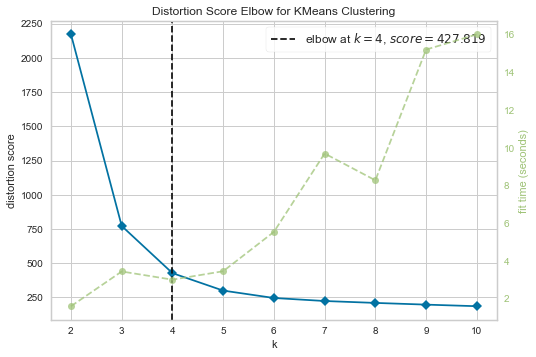

In [247]:
# On voit qu'avec le elbow il nous faut 4 clusters
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(data_agg)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

In [169]:
# Instantiate the KMeans models
#
km = KMeans(n_clusters=4, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(data_agg)
#
# Calculate Silhoutte Score
#
score = silhouette_score(data_agg, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.710


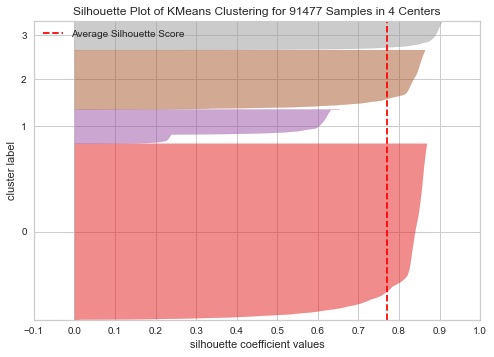

In [248]:
#KBest
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(data_agg)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

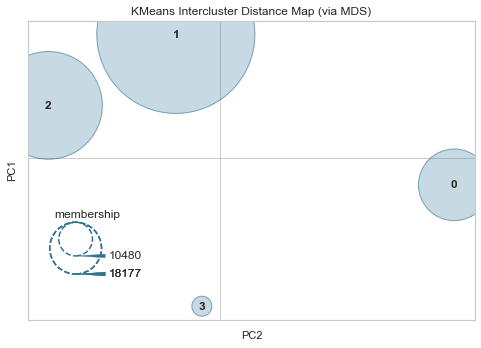

In [249]:
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(data_agg)
distance_visualizer.named_steps['distancevisualizer'].show()

In [250]:
#un test pour voir comment utiliser Kmeans
k_minh = KMeans(n_clusters=4, n_init=10,init='random')
k_minh.fit(data_agg)
pred_k_minh =  k_minh.predict(data_agg)

In [251]:
#on fait un dbscan
clustering = DBSCAN(eps=3, min_samples=2).fit(data_agg)
    
clustering

DBSCAN(eps=3, min_samples=2)

In [150]:
#on fait un dbscan
clustering2 = DBSCAN(eps=10, min_samples=2).fit(data_agg)
    
clustering2

DBSCAN(eps=10, min_samples=2)

In [151]:
print("The silhouette coefficient for",clustering2,"labels is :",silhouette_score(data_agg, labels=clustering2.labels_))

The silhouette coefficient for DBSCAN(eps=10, min_samples=2) labels is : -0.6124931266523146


In [ ]:
#le dbscan ne semble pas etre approprié pour notre jeux de données
print("The silhouette coefficient for",clustering,"labels is :",silhouette_score(data_agg, labels=clustering.labels_))

In [ ]:
data_agg['label_kmeans'] = k_minh.labels_

In [ ]:
data_agg['label_kmeans'].value_counts()

In [ ]:
data_agg

In [ ]:
data_agg.to_csv('final.csv')

In [ ]:
df_agg_final.to_csv('agg.csv')

In [192]:
kmeans_clusters_means = data_agg.groupby("label_kmeans").mean().reset_index()
kmeans_clusters_means

label_kmeans  order_item_id  review_score  payment_value  \
0             0       6.084603      3.747065     881.099070   
1             1       1.431728      4.078686     211.527291   
2             2       1.192413      4.233667     159.200946   
3             3       1.565107      4.130584     240.654259   

   payment_sequential  freight_value       price  customer_zip_code_prefix  
0            1.440257      24.224976  113.331684             242475.764234  
1            1.040333      23.666970  134.436132              39211.728196  
2            1.016559      16.304330  120.182514              11654.316743  
3            1.062483      24.679951  136.046934              87006.984300

In [ ]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()

In [ ]:
# KMeans Pipeline with best K
kmeans_model_bis = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_bis.fit(data_agg)

# Kmeans labels
kmeans_labels_bis = kmeans_model_bis.named_steps['kmeans'].labels_

# Scale X
scaler = MinMaxScaler()
X_scaled_bis = scaler.fit_transform(data_agg)
X_scaled_bis = pd.DataFrame(X_scaled_bis, index=data_agg.index, columns=data_agg.columns)
X_scaled_bis["label_kmeans"] = kmeans_labels_bis

# Group by cluster
X_scaled_clusters_bis = X_scaled_bis.groupby("label_kmeans").mean()

In [ ]:
plot_radars(data=data_agg.iloc[:,:-1], group="label_kmeans")